In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score


In [2]:
df = pd.read_excel("../data/ENB2012_data.xlsx")

df.columns = [
    "Relative Compactness", "Surface Area", "Wall Area", "Roof Area",
    "Overall Height", "Orientation", "Glazing Area",
    "Glazing Area Distribution", "Heating Load", "Cooling Load"
]

df.head()


,Relative Compactness,Surface Area,Wall Area,Roof Area,Overall Height,Orientation,Glazing Area,Glazing Area Distribution,Heating Load,Cooling Load
0,0.98,514.5,294.0,110.25,7.0,2,0.0,0,15.55,21.33
1,0.98,514.5,294.0,110.25,7.0,3,0.0,0,15.55,21.33
2,0.98,514.5,294.0,110.25,7.0,4,0.0,0,15.55,21.33
3,0.98,514.5,294.0,110.25,7.0,5,0.0,0,15.55,21.33
4,0.90,563.5,318.5,122.50,7.0,2,0.0,0,20.84,28.28


In [3]:
print("Dataset shape:", df.shape)

df.info()

print("\nMissing values:")
print(df.isnull().sum())


Dataset shape: (768, 10)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 10 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Relative Compactness       768 non-null    float64
 1   Surface Area               768 non-null    float64
 2   Wall Area                  768 non-null    float64
 3   Roof Area                  768 non-null    float64
 4   Overall Height             768 non-null    float64
 5   Orientation                768 non-null    int64  
 6   Glazing Area               768 non-null    float64
 7   Glazing Area Distribution  768 non-null    int64  
 8   Heating Load               768 non-null    float64
 9   Cooling Load               768 non-null    float64
dtypes: float64(8), int64(2)
memory usage: 60.1 KB

Missing values:
Relative Compactness         0
Surface Area                 0
Wall Area                    0
Roof Area                    0
Overal

In [4]:
df.describe()


,Relative Compactness,Surface Area,Wall Area,Roof Area,Overall Height,Orientation,Glazing Area,Glazing Area Distribution,Heating Load,Cooling Load
count,768.000000,768.000000,768.000000,768.000000,768.00000,768.000000,768.000000,768.00000,768.000000,768.000000
mean,0.764167,671.708333,318.500000,176.604167,5.25000,3.500000,0.234375,2.81250,22.307195,24.587760
std,0.105777,88.086116,43.626481,45.165950,1.75114,1.118763,0.133221,1.55096,10.090204,9.513306
min,0.620000,514.500000,245.000000,110.250000,3.50000,2.000000,0.000000,0.00000,6.010000,10.900000
25%,0.682500,606.375000,294.000000,140.875000,3.50000,2.750000,0.100000,1.75000,12.992500,15.620000
50%,0.750000,673.750000,318.500000,183.750000,5.25000,3.500000,0.250000,3.00000,18.950000,22.080000
75%,0.830000,741.125000,343.000000,220.500000,7.00000,4.250000,0.400000,4.00000,31.667500,33.132500
max,0.980000,808.500000,416.500000,220.500000,7.00000,5.000000,0.400000,5.00000,43.100000,48.030000


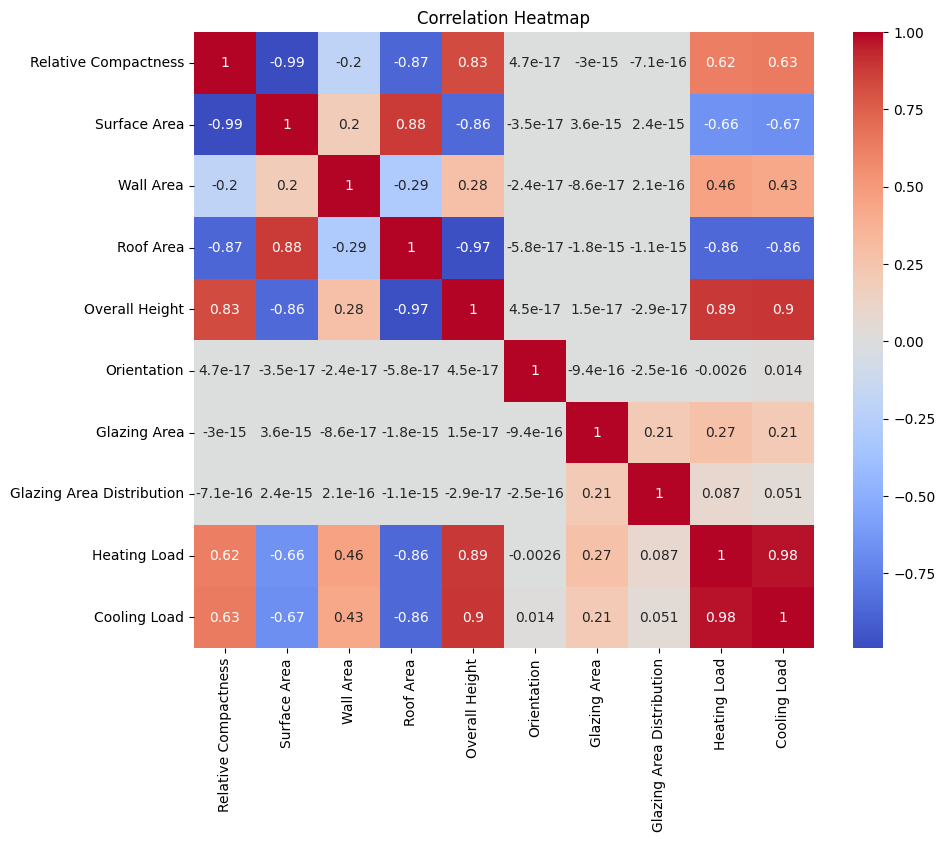

In [5]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 8))
sns.heatmap(df.corr(), annot=True, cmap="coolwarm")
plt.title("Correlation Heatmap")
plt.show()


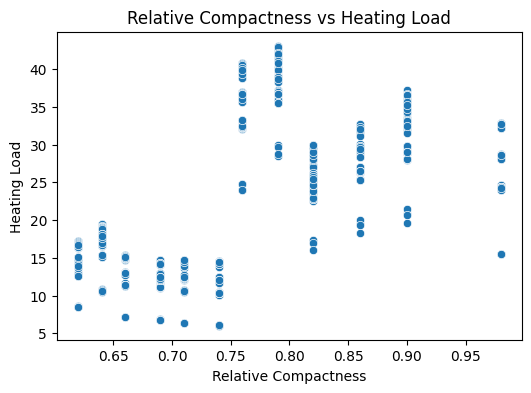

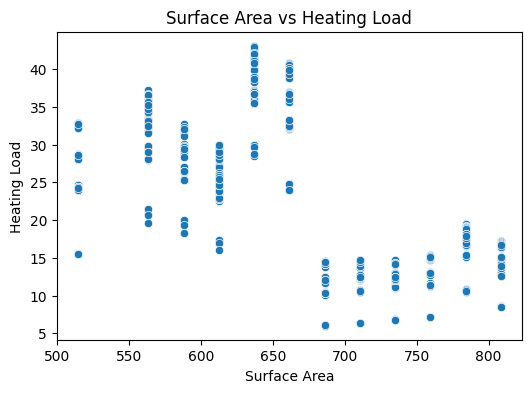

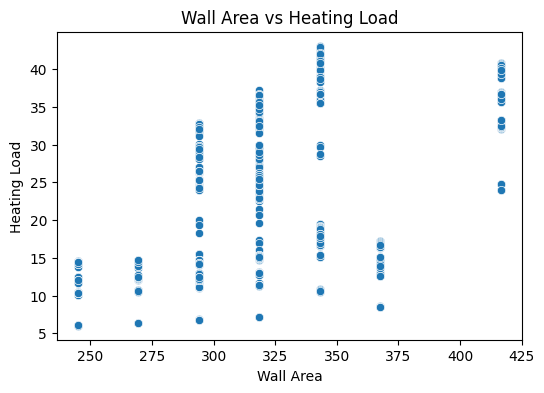

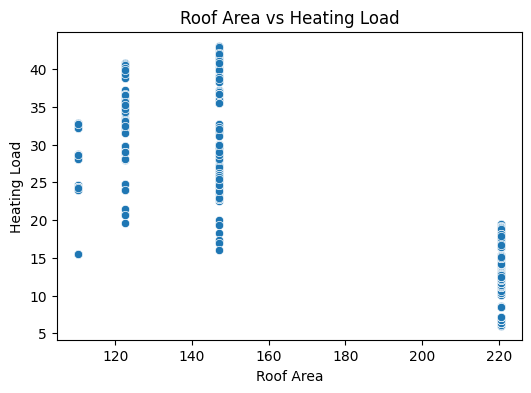

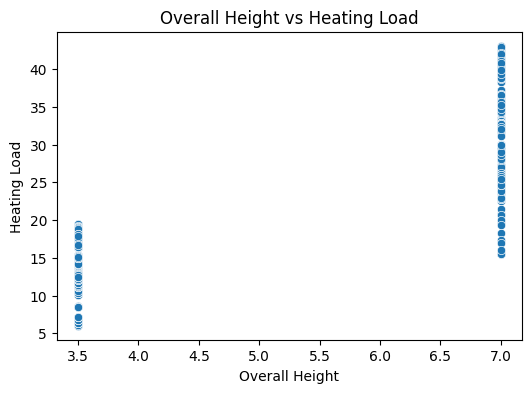

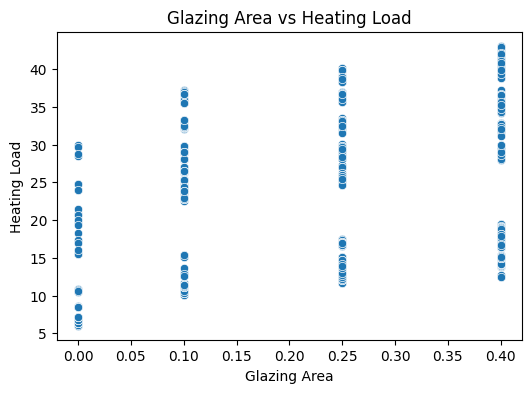

In [6]:
feature_cols = [
    "Relative Compactness", "Surface Area", "Wall Area",
    "Roof Area", "Overall Height", "Glazing Area"
]

for col in feature_cols:
    plt.figure(figsize=(6, 4))
    sns.scatterplot(x=col, y="Heating Load", data=df)
    plt.title(f"{col} vs Heating Load")
    plt.show()


In [7]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

X = df.drop(columns=["Heating Load", "Cooling Load"])  # Use geometry features
y = df["Heating Load"]  # Target variable

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

model = LinearRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Mean Squared Error (MSE):", mse)
print("R² Score:", r2)


Mean Squared Error (MSE): 9.153207645941668
R² Score: 0.9121846294352439


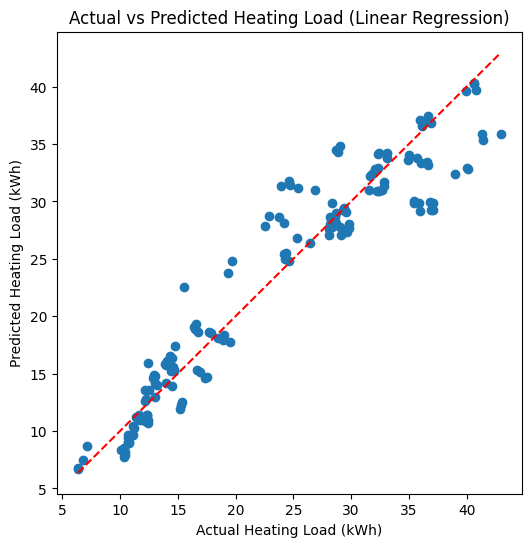

In [8]:
plt.figure(figsize=(6, 6))
plt.scatter(y_test, y_pred)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], "r--")
plt.xlabel("Actual Heating Load (kWh)")
plt.ylabel("Predicted Heating Load (kWh)")
plt.title("Actual vs Predicted Heating Load (Linear Regression)")
plt.show()


In [10]:
from sklearn.ensemble import RandomForestRegressor

rf_model = RandomForestRegressor(
    n_estimators=100,  # Number of trees
    max_depth=None,    # Let trees grow until all leaves are pure
    random_state=42
)

rf_model.fit(X_train, y_train)

y_pred_rf = rf_model.predict(X_test)

mse_rf = mean_squared_error(y_test, y_pred_rf)
r2_rf = r2_score(y_test, y_pred_rf)

print(" Random Forest Results")
print("Mean Squared Error (MSE):", mse_rf)
print("R² Score:", r2_rf)


 Random Forest Results
Mean Squared Error (MSE): 0.24088314337662134
R² Score: 0.9976889803753333


In [11]:
y_cooling = df["Cooling Load"]

X_train_cool, X_test_cool, y_train_cool, y_test_cool = train_test_split(
    X, y_cooling, test_size=0.2, random_state=42
)

rf_model_cool = RandomForestRegressor(
    n_estimators=100,
    max_depth=None,
    random_state=42
)

rf_model_cool.fit(X_train_cool, y_train_cool)

y_pred_cool = rf_model_cool.predict(X_test_cool)

mse_cool = mean_squared_error(y_test_cool, y_pred_cool)
r2_cool = r2_score(y_test_cool, y_pred_cool)

print(" Random Forest Cooling Load Results")
print("Mean Squared Error (MSE):", mse_cool)
print("R² Score:", r2_cool)


 Random Forest Cooling Load Results
Mean Squared Error (MSE): 2.9340964745454556
R² Score: 0.9683338660414131


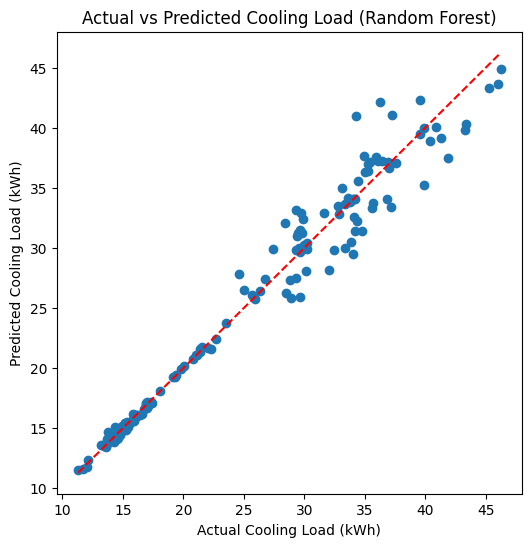

In [12]:
plt.figure(figsize=(6, 6))
plt.scatter(y_test_cool, y_pred_cool)
plt.plot([y_test_cool.min(), y_test_cool.max()],
         [y_test_cool.min(), y_test_cool.max()],
         "r--")
plt.xlabel("Actual Cooling Load (kWh)")
plt.ylabel("Predicted Cooling Load (kWh)")
plt.title("Actual vs Predicted Cooling Load (Random Forest)")
plt.show()


In [13]:
import joblib

joblib.dump(rf_model, "heating_model.pkl")
joblib.dump(rf_model_cool, "cooling_model.pkl")


['cooling_model.pkl']

In [19]:
wall_u_values = {0: 1.2, 1: 0.6, 2: 0.3}  
roof_u_values = {0: 1.0, 1: 0.5, 2: 0.2}  
window_u_values = {0: 5.5, 1: 2.7, 2: 1.0}  

df["Wall Type"] = np.random.choice(list(wall_u_values.keys()), size=len(df))
df["Roof Type"] = np.random.choice(list(roof_u_values.keys()), size=len(df))
df["Window Type"] = np.random.choice(list(window_u_values.keys()), size=len(df))

def adjust_loads(row):
    
    wall_factor = wall_u_values[row["Wall Type"]] 
    roof_factor = roof_u_values[row["Roof Type"]] 
    window_factor = window_u_values[row["Window Type"]]
    
    heating_adj = row["Heating Load"] * (0.5 * wall_factor + 0.3 * roof_factor + 0.2 * window_factor)
    
    cooling_adj = row["Cooling Load"] * (0.7 * wall_factor + 0.2 * roof_factor + 0.1 * window_factor)
    
    return heating_adj, cooling_adj

df[["Heating Load", "Cooling Load"]] = df.apply(
    lambda row: adjust_loads(row), axis=1, result_type="expand"
)

df.head()


,Relative Compactness,Surface Area,Wall Area,Roof Area,Overall Height,Orientation,Glazing Area,Glazing Area Distribution,Heating Load,Cooling Load,Wall Type,Roof Type,Window Type
0,0.98,514.5,294.0,110.25,7.0,2,0.0,0,58.000394,84.547326,0,1,0
1,0.98,514.5,294.0,110.25,7.0,3,0.0,0,27.266361,27.179261,2,1,0
2,0.98,514.5,294.0,110.25,7.0,4,0.0,0,23.205783,22.847053,2,2,1
3,0.98,514.5,294.0,110.25,7.0,5,0.0,0,38.763270,38.857730,1,2,0
4,0.90,563.5,318.5,122.50,7.0,2,0.0,0,15.226614,12.360181,2,0,2


In [21]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
import joblib

X = df.drop(columns=["Heating Load", "Cooling Load"])
y_heating = df["Heating Load"]
y_cooling = df["Cooling Load"]

X_train, X_test, y_train_heat, y_test_heat = train_test_split(
    X, y_heating, test_size=0.2, random_state=42
)
X_train, X_test, y_train_cool, y_test_cool = train_test_split(
    X, y_cooling, test_size=0.2, random_state=42
)

rf_heating = RandomForestRegressor(n_estimators=100, random_state=42)
rf_heating.fit(X_train, y_train_heat)

rf_cooling = RandomForestRegressor(n_estimators=100, random_state=42)
rf_cooling.fit(X_train, y_train_cool)


joblib.dump(rf_heating, "heating_model_with_materials.pkl")
joblib.dump(rf_cooling, "cooling_model_with_materials.pkl")

print(" Models retrained and saved with material effects!")


 Models retrained and saved with material effects!


In [23]:
wall_u_values = {0: 2.5, 1: 0.8, 2: 0.15}  # Poor → Average → High-performance walls
roof_u_values = {0: 1.8, 1: 0.5, 2: 0.2}   # Poor → Average → Green roof
window_u_values = {0: 5.5, 1: 2.7, 2: 1.0} # Single → Double → Triple glazing

def adjust_loads(row):
    wall_factor = wall_u_values[row["Wall Type"]] / 0.8  # baseline = average wall
    roof_factor = roof_u_values[row["Roof Type"]] / 0.5  # baseline = insulated roof
    window_factor = window_u_values[row["Window Type"]] / 2.7  # baseline = double glazing

    heating_adj = row["Heating Load"] * (
        0.7 * wall_factor + 0.15 * roof_factor + 0.15 * window_factor
    )


    cooling_factor = (
        0.6 * wall_factor + 0.2 * roof_factor + 0.2 * window_factor
    )

    if row["Roof Type"] == 2:  
        cooling_factor *= 0.7  
        heating_adj *= 1.05    

    if row["Window Type"] == 2:  
        cooling_factor *= 0.85  

    cooling_adj = row["Cooling Load"] * cooling_factor

    return heating_adj, cooling_adj

df[["Heating Load", "Cooling Load"]] = df.apply(
    lambda row: adjust_loads(row), axis=1, result_type="expand"
)


In [24]:
X = df.drop(columns=["Heating Load", "Cooling Load"])
y_heating = df["Heating Load"]
y_cooling = df["Cooling Load"]


X_train, X_test, y_train_heat, y_test_heat = train_test_split(
    X, y_heating, test_size=0.2, random_state=42
)
X_train, X_test, y_train_cool, y_test_cool = train_test_split(
    X, y_cooling, test_size=0.2, random_state=42
)


rf_heating = RandomForestRegressor(n_estimators=100, random_state=42)
rf_heating.fit(X_train, y_train_heat)

rf_cooling = RandomForestRegressor(n_estimators=100, random_state=42)
rf_cooling.fit(X_train, y_train_cool)


joblib.dump(rf_heating, "heating_model_with_realistic_materials.pkl")
joblib.dump(rf_cooling, "cooling_model_with_realistic_materials.pkl")

print(" Models retrained and saved with realistic material effects!")


 Models retrained and saved with realistic material effects!
